In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr
A = fdr.DataReader('012280', '2018-01-01', '2019-11-30')

#Prophet

In [4]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
A['y'] = A['Close']
A['ds'] = A.index

In [5]:
#prophet 객체 선언 및 학습
m = Prophet(changepoint_prior_scale=0.8, #보통 changepoint_prior_scale= 0.05로 되어있음 
            yearly_seasonality=True,
            daily_seasonality=True
            )
m.fit(A)
future = m.make_future_dataframe(periods=30) #30일 예측
forecast = m.predict(future)#predict로 예측을 진행합니다. predict 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-30:-1] #예측 30일을 출력 합니다

,ds,yhat,yhat_lower,yhat_upper
470,2019-11-30,1699.517082,1648.707541,1750.057288
471,2019-12-01,1712.796126,1663.251867,1764.032024
472,2019-12-02,1732.315341,1680.218578,1785.880803
473,2019-12-03,1748.500364,1698.927365,1800.252551
474,2019-12-04,1758.461920,1709.501740,1807.918919
475,2019-12-05,1770.567252,1715.120569,1821.114789
476,2019-12-06,1786.403786,1732.704762,1841.049875
477,2019-12-07,1789.760877,1736.440998,1844.565480
478,2019-12-08,1802.099500,1748.732402,1861.788935
479,2019-12-09,1820.636803,1765.930139,1879.064637


시각화

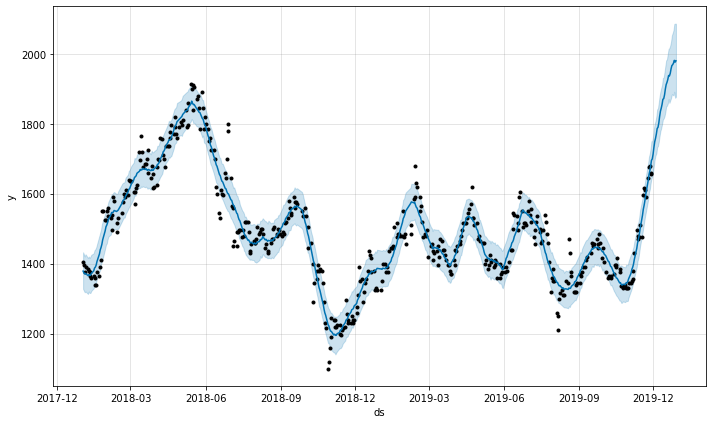

In [6]:
#plot은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.
fig = m.plot(forecast)

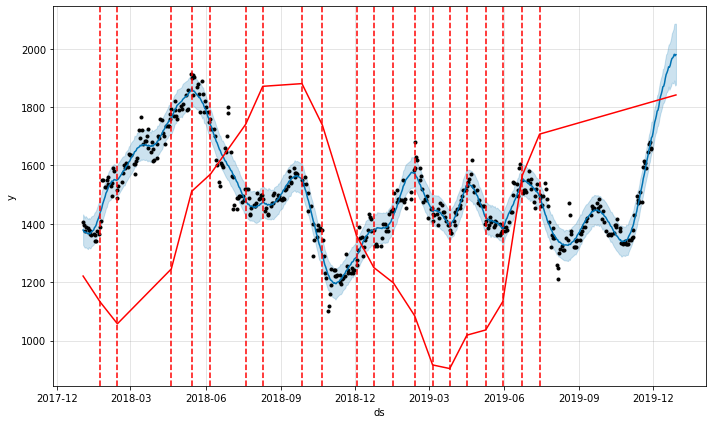

In [7]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [8]:
Close = A['Close']
yhat = forecast[['yhat']].iloc[0:470]
# RMSE
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Close, yhat) 
np.sqrt(MSE)

40.09825280284895

In [9]:
B = fdr.DataReader('012280', '2019-12-01', '2019-12-31') # test
B

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-12-02,1650,1675,1570,1610,905042,-0.027190
2019-12-03,1610,1680,1595,1670,509754,0.037267
2019-12-04,1670,1680,1615,1630,301252,-0.023952
2019-12-05,1630,1655,1560,1605,559106,-0.015337
2019-12-06,1600,1645,1590,1640,376440,0.021807
2019-12-09,1655,1700,1620,1630,708241,-0.006098
2019-12-10,1620,1630,1545,1560,634723,-0.042945
2019-12-11,1560,1575,1555,1565,214115,0.003205
2019-12-12,1600,1630,1585,1605,605974,0.025559


In [10]:
B.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2019-12-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     int64  
 1   High    20 non-null     int64  
 2   Low     20 non-null     int64  
 3   Close   20 non-null     int64  
 4   Volume  20 non-null     int64  
 5   Change  20 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.1 KB


In [11]:
B['ds'] = B.index

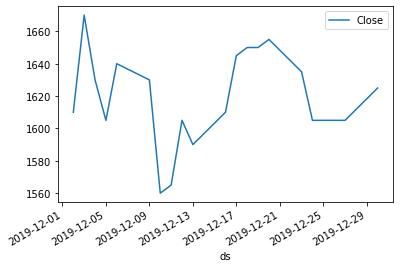

In [12]:
B.plot(x='ds', y='Close')

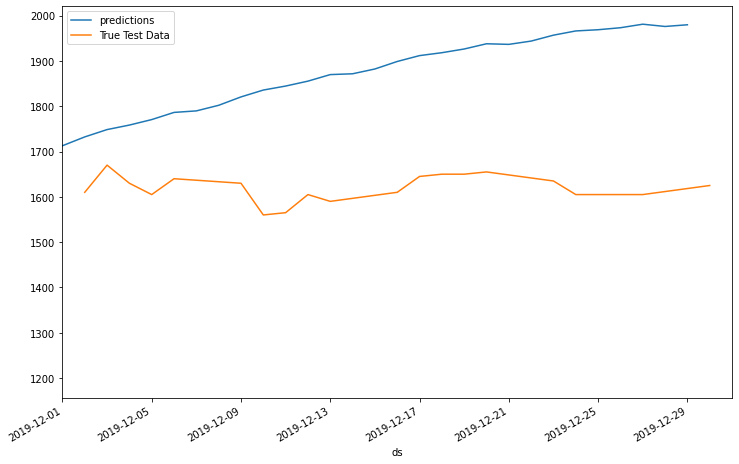

In [13]:
#m.plot(forecast)
ax = forecast[['yhat']].iloc[-1:-30]
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
B.plot(x='ds', y='Close', legend=True, label='True Test Data',ax=ax,xlim=('2019-12-01', '2019-12-31'))